# Final Project: HR Analytics - Employee Promotion Prediction
Margarita Espinoza  [maes2069@colorado.edu]  
CSPB 3022 - Spring 2023

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn

## Part 1: Project Topic & Data Cleaning / EDA

### Project Topic  

*Note: My project topic has changed since submitting part 1*

**PART 1 SUBMISSION:**  
This project is a classification problem, set to predict whether an employee in the dataset is likely to be promoted or not after the EDA process. This problem is important to solve because it makes the internal hiring process more efficient AND it allows hiring managers to see ALL potential candidates based on performance data. In addition, I would like to discover patterns and outliers related to gender, age, education, and department.  

My goal is to predict if a candidate is likely to receive a promotion or not and to use that information to add a column named 'promotion_likely' with a binary yes/no identifier for each candidate.

**PART 2 SUBMISSION:**  
This dataset was collected to predict whether an employee in a mulit-national company is likely to be promoted or not after the EDA process. There were 2 datasests included in the Kaggle repository, one before the promotion prediction and one after that includes the binary 'is_promoted' column. My initial thought was to perform a binary classification algorithm to predict wheter each employee is likely to be promoted or not and then compare it to the data in the 'is_promoted' column, which is described above in the 'PART 1 SUBMISSION' section. 

Instead of attempting to predict if an employee will be pomoted or not, I will be using Naive Bayesian Classification and target feature 'is_promoted' to determine the probability of being promoted given different attributes such as gender, education, trainings, awards, and years of service.

My goal is to learn details about this company's promotion criteria and how features related to things that are controllable by the employee (such as education) and not controllable (like age and gender) impact their probability of being promoted.

### Bonus  

I think changing my idea and detetermining probabilites of being promoted based on features is more interesting than simply determining if an employee will be promoted or not! I understand that this type of data analysis was not the intention for this dataset, as mentioned in Kaggle, however its my opinion that it could uncover trends about their promomtion criteria that any company may be interested in researching further. 

### Data  

**About Dataset**  
This dataset was found on Kaggle and originates from a large multi-national company wanting to identify potential promotion candidates across their organization in order to expedite the hiring process. Multiple attributes have been provided around Employee's past and current performance along with demographics to evaluate eligibility.
 

**Features:**  

- employee_id: Unique ID for employee (int64)
- department: Department of employee (object)
- region: Region of employment (unordered) (object)
- education: Education Level (object)
- gender: Gender of Employee (object)
- recruitment_channel: Channel of recruitment for employee (object)
- no_ of_ trainings: no of other trainings completed in previous year on soft skills, technical skills etc. (int64)
- age: Age of Employee (int64)
- previous_ year_ rating: Employee Rating for the previous year (float64)
- length_ of_ service: Length of service in years (int64)
- awards_ won?: if awards won during previous year then 1 else 0 (int64)
- avg_ training_ score: Average score in current training evaluations (int64)
- is_promoted: Recommended for promotion binary (int64)

**Table Data:**

- Rows: 54808
- Columns: 13
- File Size is: 3696576 bytes
- Feature Types: 8 numeric features, 5 categorical features.

In [2]:
dataset = pd.read_csv('HRAnalytics_train.csv')
dataset.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [3]:
print('Rows:', np.shape(dataset)[0])
print('Columns:', np.shape(dataset)[1])
print("File Size is:", os.path.getsize('HRAnalytics_train.csv'), "bytes")
print("Column Types:")
dataset.info()

Rows: 54808
Columns: 13
File Size is: 3696576 bytes
Column Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ M

### Data Cleaning

**Data Cleaning & Reduction:**  
To clean this dataset I intend to perform the following tasks:  
- Replace all null values with generic zero values to allow for seamless numeric calculations.
- Remove unnecessary columns such as 'recruitment_channel' and 'region' to reduce the size of the dataset and create a more manageable pandas DataFrame.
- ~~Review all unique string values to consider converting into integer equivalents if needed during EDA. For example, I will convert male and female values to 1 and 0 in the 'gender' column.~~  
- ~~Group data by 'department' to determine how the likelyhood of promotion differs in each category and further reduce dataset size if neccessary.~~  
- Review all unique values in each column to determine which categorical columns to convert into numerical values to assist with Bayesian Classification.  
- Decide which categories to use (age, education, gender) and create a new dataframe.

In [4]:
# Review columns with null values
dataset.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
clean_dataset = dataset

# Replacing NULL values
clean_dataset['education'] = clean_dataset['education'].fillna('N/A')
clean_dataset['previous_year_rating'] = clean_dataset['previous_year_rating'].fillna(0)

# Removing unnecessary columns
clean_dataset = clean_dataset.drop("recruitment_channel", axis='columns')
clean_dataset = clean_dataset.drop("region", axis='columns')
clean_dataset = clean_dataset.drop("employee_id", axis='columns')
clean_dataset = clean_dataset.drop("department", axis='columns')

## Review num of unique vals in each column (Cardinality)
columns = clean_dataset.columns
for var in columns:
    print(var, ':', len(clean_dataset[var].unique()))

education : 4
gender : 2
no_of_trainings : 10
age : 41
previous_year_rating : 6
length_of_service : 35
awards_won? : 2
avg_training_score : 61
is_promoted : 2


In [6]:
## Review frequency of unique vals
# for var in columns:
#     print(clean_dataset[var].value_counts(),'\n')

In [7]:
## Review Unique Values of Strings
print('CATEGORICAL VALUES:')
for vals in columns:
    if clean_dataset[vals].dtypes == 'O':
        print(vals,":", clean_dataset[vals].unique())

## Review the mean value of each numeric feature
print('\nNUMERIC COLUMN MEANS:')  
for vals in columns:
    if clean_dataset[vals].dtypes != 'O':
            print(vals,":", clean_dataset[vals].mean())  

CATEGORICAL VALUES:
education : ["Master's & above" "Bachelor's" 'N/A' 'Below Secondary']
gender : ['f' 'm']

NUMERIC COLUMN MEANS:
no_of_trainings : 1.253010509414684
age : 34.80391548679025
previous_year_rating : 3.0787476280834913
length_of_service : 5.865512333965844
awards_won? : 0.023171799737264635
avg_training_score : 63.38675010947307
is_promoted : 0.08517004816815063


In [8]:
## Convert categorical features to numeric
clean_dataset['gender'] = np.where(clean_dataset['gender'] == 'm', 1, 0)
   
clean_dataset['education'] = clean_dataset['education'].replace(to_replace = "N/A", value=0)
clean_dataset['education'] = clean_dataset['education'].replace(to_replace = "Below Secondary", value=1)
clean_dataset['education'] = clean_dataset['education'].replace(to_replace = "Bachelor's", value=2)
clean_dataset['education'] = clean_dataset['education'].replace(to_replace = "Master's & above", value=3)

## Converting is_promoted to string values
clean_dataset['is_promoted'] = np.where(clean_dataset['is_promoted'] == 1, 'Promoted', 'Not Promoted')

clean_dataset.head()

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,3,0,1,35,5.0,8,0,49,Not Promoted
1,2,1,1,30,5.0,4,0,60,Not Promoted
2,2,1,1,34,3.0,7,0,50,Not Promoted
3,2,1,2,39,1.0,10,0,50,Not Promoted
4,2,1,1,45,3.0,2,0,73,Not Promoted


In [9]:
## Decide which features I want to use for Bayesian Classification and create new dataframes

feats_dataset = clean_dataset[['age', 'gender', 'education', 'is_promoted']]
feats_dataset['is_promoted'] = dataset['is_promoted']

feats_dataset.head()

/tmp/ipykernel_310/1380989858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feats_dataset['is_promoted'] = dataset['is_promoted']


,age,gender,education,is_promoted
0,35,0,3,0
1,30,1,2,0
2,34,1,2,0
3,39,1,2,0
4,45,1,2,0


In [10]:
## Create a dataframe with only string values for visualizations
feats_dataset_label = clean_dataset[['is_promoted','age']]
feats_dataset_label[['gender', 'education']] = dataset[['gender', 'education']]
feats_dataset_label['education'] = feats_dataset_label['education'].fillna('N/A')
feats_dataset_label['age'] = np.where(feats_dataset_label['age'] <= 35, '≤ 35', '> 35')

feats_dataset_label.head()

/tmp/ipykernel_310/3821790122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feats_dataset_label[['gender', 'education']] = dataset[['gender', 'education']]
/tmp/ipykernel_310/3821790122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feats_dataset_label[['gender', 'education']] = dataset[['gender', 'education']]
/tmp/ipykernel_310/3821790122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,is_promoted,age,gender,education
0,Not Promoted,≤ 35,f,Master's & above
1,Not Promoted,≤ 35,m,Bachelor's
2,Not Promoted,≤ 35,m,Bachelor's
3,Not Promoted,> 35,m,Bachelor's
4,Not Promoted,> 35,m,Bachelor's


### Exploratory Data Analysis & Visualizations

Below are visualizations to explore the data in my dataset, starting with the breakdown of employees in each category.

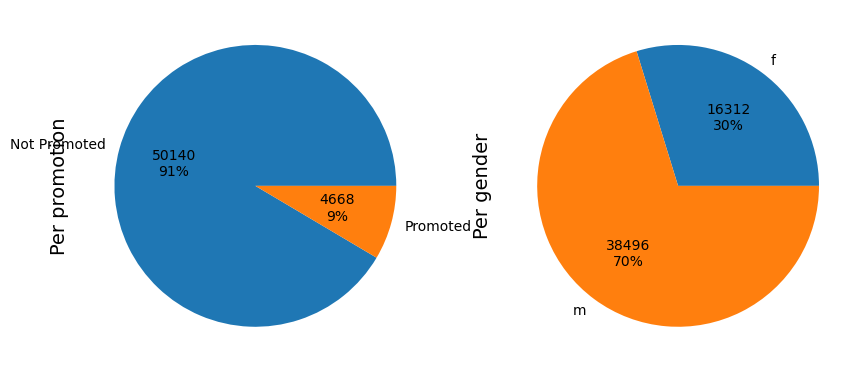

In [11]:
def label_function(val):
    return f'{val / 100 * len(feats_dataset_label):.0f}\n{val:.0f}%'

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

feats_dataset_label.groupby('is_promoted').size().plot(kind='pie', autopct=label_function, ax=ax1);
feats_dataset_label.groupby('gender').size().plot(kind='pie', autopct=label_function, ax=ax2);

ax1.set_ylabel('Per promotion', size=14)
ax2.set_ylabel('Per gender', size=14)

plt.show()

According to the pie charts above we can see that there are very few employees eligible for promotion. We can also see that 70% of the employees in this data set are male. Below shows the majority of employees have a Bachelor's degree and are over 30 years old.

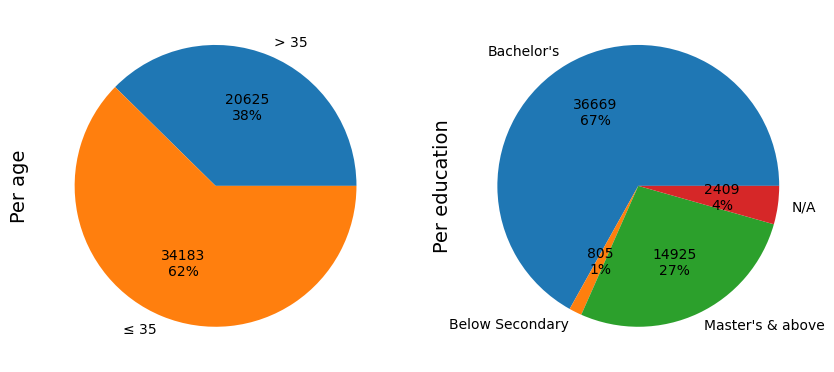

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

feats_dataset_label.groupby('age').size().plot(kind='pie', autopct=label_function, ax=ax1);
feats_dataset_label.groupby('education').size().plot(kind='pie', autopct=label_function, ax=ax2);

ax1.set_ylabel('Per age', size=14)
ax2.set_ylabel('Per education', size=14)

plt.show()

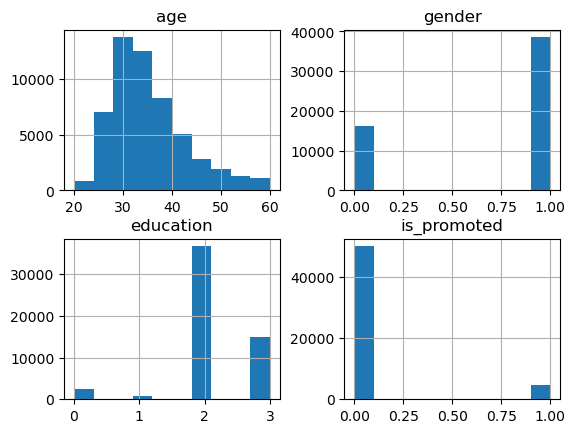

In [13]:
feats_dataset.hist();

By grouping the dataframe by every category we can see a visual count of each type of employee that is eligible for promotion. We can see that males less that or equal to 35 years old with a Bachelor's degree make the majority of promoted employees.

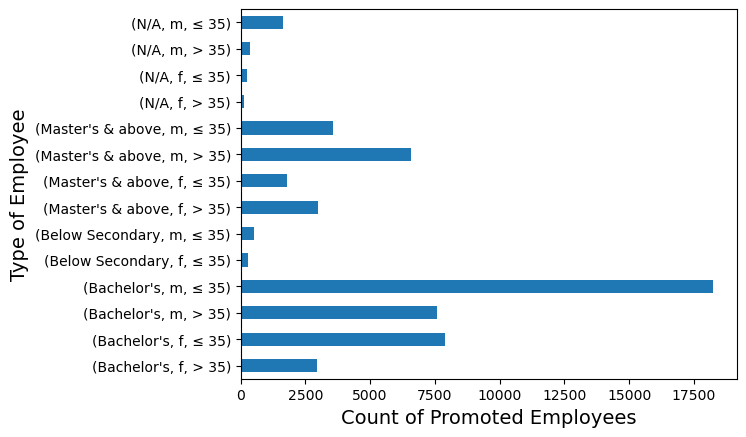

In [14]:
grp = feats_dataset_label.loc[feats_dataset_label['is_promoted'] == 'Promoted' ]
grp = feats_dataset_label.groupby(['education', 'gender', 'age'])['is_promoted'].count()
grp.plot(kind='barh');
plt.ylabel('Type of Employee', size=14);
plt.xlabel('Count of Promoted Employees', size=14);


Below is a correlation matrix that shows that education is the only obvious correlation for being eligible for promotion, which is ideal for diverse and equitable work place!

                  age    gender  education  is_promoted
age          1.000000 -0.016293   0.344183    -0.017166
gender      -0.016293  1.000000  -0.056851    -0.011109
education    0.344183 -0.056851   1.000000     0.036487
is_promoted -0.017166 -0.011109   0.036487     1.000000


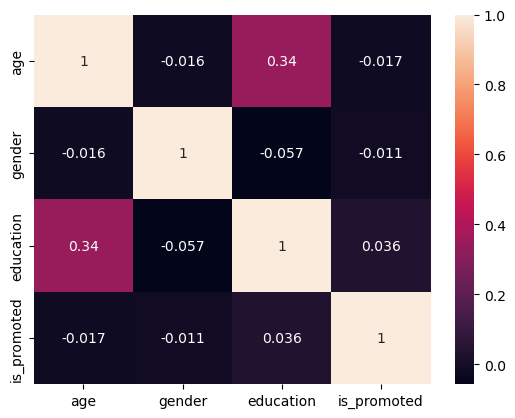

In [15]:
corr_matrix = feats_dataset.corr()
print(corr_matrix)
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [16]:
## Calculate mean and standard deviation for each column
columns = feats_dataset.columns

print('FEATURE MEANS')
for vals in columns:
    if feats_dataset[vals].dtypes != 'O':
        print(vals, ':' ,feats_dataset[vals].mean())

print('\nFEATURE STDDEVS')
for vals in columns:
    if feats_dataset[vals].dtypes != 'O':
        print(vals, ':', feats_dataset[vals].std())

print('\nFEATURE VARIANCE')
for vals in columns:
    if feats_dataset[vals].dtypes != 'O':
        print(vals, ':', feats_dataset[vals].var())


FEATURE MEANS
age : 34.80391548679025
gender : 0.7023792147131805
education : 2.1697197489417603
is_promoted : 0.08517004816815063

FEATURE STDDEVS
age : 7.660169201585887
gender : 0.4572159966708521
education : 0.6588010117362554
is_promoted : 0.27913712169541954

FEATURE VARIANCE
age : 58.67819219692497
gender : 0.20904646761172063
education : 0.43401877306471365
is_promoted : 0.07791753270840344


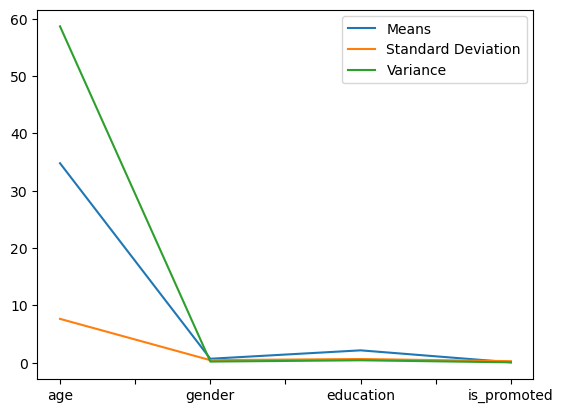

In [17]:
feats_dataset.mean().plot(label='Means');
feats_dataset.std().plot(label='Standard Deviation');
feats_dataset.var().plot(label='Variance');

plt.legend();

**EDA Summary**  
After exploring the dataset, we have a basic understanding of the demographics of this company and the types of employee that have been promoted. So far we have only identified a correlation between being promoted and education, but how does age and gender play impact employee performance? I have had a difficult time finding comprehensive visualizations for binary data, but as you can see above - the pie charts appear to be the most telling. 

### Calculate Class Probabilities

I will be using a Gaussian Naive Bayes Classification to to determine the likelyhood of promotion given each category. 

Using Bayes Theorem, $P(y|X) = \frac{P(X|y) * P(y)}{P(X)}$ where $y$ is the class labels and $X$ is the Feature Vector *is_promoted*, we will calculate the class with the highest post probability of being promoted.  

- $P(y)=$ Prior probability, frequency of each class  
- $P(X_i|y)=$ Class conditional probability, modeled with Gaussian distribution: $P(X_i|y) = \frac{1}{sqrt(2\pi\sigma^2_y)}*exp(-\frac{(x_i-\mu_y)^2}{2\sigma^2_y})$

In [18]:
# first change features to a binary category 
promotion_data = clean_dataset
promotion_data['age'] = np.where(promotion_data['age'] <= 35, 1, 0)
promotion_data['education'] = np.where(promotion_data['education'] <= 1, 0, 1)

promo_data = promotion_data.loc[promotion_data["is_promoted"] == 'Promoted']
not_promo_data = promotion_data.loc[promotion_data["is_promoted"] == 'Not Promoted']

In [19]:
## Calculate Prior Probability: P(Promoted) and P(Not Promoted)

n_employees = clean_dataset['is_promoted'].count()
n_promo = promo_data.count()[0]
n_not_promo = not_promo_data.count()[0]

print('Count of Employees:', n_employees)
print('Count of Promoted Employees:', n_promo)
print('Count of Not Promoted Employees:', n_not_promo)

P_promo = n_promo / n_employees
P_not_promo = n_not_promo / n_employees

print('\nP(Promoted) =', P_promo)
print('P(Not_Promoted) =', P_not_promo)

Count of Employees: 54808
Count of Promoted Employees: 4668
Count of Not Promoted Employees: 50140

P(Promoted) = 0.08517004816815063
P(Not_Promoted) = 0.9148299518318493


In [20]:
## Create a function to calculate P(class|is_promoted) for age, gender, and education class

# Step 1: calculate the count in each category
def Counts_by_feat(feature, cl_names):
    print('Feature:',feature)
    count_promo = []
    count_notpromo = []
    
    promo_lst = np.sort(promo_data[feature].unique())
    for i in promo_lst:
        count_feats_promo = promo_data.loc[promo_data[feature] == i].count()[0]
        count_promo.append(count_feats_promo)
        # print('Count of Promoted', cl_names[i], ':', count_class_promo)
    
    notpromo_lst = np.sort(not_promo_data[feature].unique())           
    for j in notpromo_lst:
        count_feats_notpromo = not_promo_data.loc[not_promo_data[feature] == j].count()[0]
        count_notpromo.append(count_feats_notpromo)
        # print('Count of Not Promoted', cl_names[j], ':', count_class_notpromo)
    count_lst = count_promo, count_notpromo
    return count_lst
            
# Step 2: calculate the conditional probability of each category
def Prob_by_class(feature, feat_counts, promo_counts, cl_names):
    count_promo,count_notpromo = feat_counts[0],feat_counts[1]
    n_promo, n_not_promo = promo_counts[0],promo_counts[1]
    
    prob_promo = []
    prob_notpromo = []
    
    promo_lst = np.sort(promo_data[feature].unique())
    for i in promo_lst:
        P_feat_promo = count_promo[i] / n_promo
        prob_promo.append(P_feat_promo)
        print('P(',cl_names[i],'|Promoted ):', P_feat_promo)
    
    notpromo_lst = np.sort(not_promo_data[feature].unique())
    for j in notpromo_lst:
        P_feat_notpromo = count_notpromo[j] / n_not_promo
        prob_notpromo.append(P_feat_notpromo)
        print('P(',cl_names[j],'|Not Promoted ):', P_feat_notpromo)
    prob_lst = prob_promo, prob_notpromo
    return prob_lst

# Step 3: Calculate the probability of employee X given promoted or not
def Prob_by_promo(prob_lst):
    prob_promo,prob_notpromo = prob_lst[0],prob_lst[1]
    
    prob_e_promo = np.prod(prob_promo)
    prob_e_notpromo = np.prod(prob_notpromo)
    print('P(Employee X |Promoted ):', prob_e_promo)
    print('P(Employee X |Not Promoted ):', prob_e_notpromo)
    prob_lst = prob_e_promo,prob_e_notpromo
    return prob_lst

# Step 4: Calculate the prediction of employee x being promoted
def Predict_promo(prob_lst):
    prob_promo,prob_notpromo = prob_lst[0],prob_lst[1]
    
    prob_e_promo = prob_promo * P_promo
    prob_e_notpromo = prob_notpromo * P_not_promo
    prob_e_notpromo = np.prod(prob_notpromo)
    print('P(Employee X |Promoted ) * P(Promoted):', prob_e_promo)
    print('P(Employee X |Not Promoted * P(Not Promoted):', prob_e_notpromo)
    prob_lst = prob_e_promo,prob_e_notpromo
    return prob_lst



In [21]:
## Using the function above with the age, gender, and education categories.

age = Prob_by_class('age', Counts_by_feat('age', ['> 35', '≤ 35']), [n_promo,n_not_promo], ['> 35', '≤ 35'])
gender = Prob_by_class('gender', Counts_by_feat('gender', ['Male', 'Female']), [n_promo,n_not_promo], ['Male', 'Female'])
edu = Prob_by_class('education', Counts_by_feat('education', ['No College', 'College Grad']), [n_promo,n_not_promo], ['No College', 'College Grad'])

prob_lst_promo = [y for x in [age[0], gender[0], edu[0]] for y in x]
prob_lst_npromo = [y for x in [age[1], gender[1], edu[1]] for y in x]
prob_lst1 = prob_lst_promo,prob_lst_npromo

prob_lst2 = Prob_by_promo(prob_lst1)


Feature: age
P( > 35 |Promoted ): 0.3476863753213368
P( ≤ 35 |Promoted ): 0.6523136246786633
P( > 35 |Not Promoted ): 0.37897885919425606
P( ≤ 35 |Not Promoted ): 0.6210211408057439
Feature: gender
P( Male |Promoted ): 0.31426735218509
P( Female |Promoted ): 0.6857326478149101
P( Male |Not Promoted ): 0.29607100119664936
P( Female |Not Promoted ): 0.7039289988033506
Feature: education
P( No College |Promoted ): 0.04048843187660668
P( College Grad |Promoted ): 0.9595115681233933
P( No College |Not Promoted ): 0.06033107299561229
P( College Grad |Not Promoted ): 0.9396689270043878
P(Employee X |Promoted ): 0.0018988007175316055
P(Employee X |Not Promoted ): 0.002780750429258779


In [22]:
predict = Predict_promo(prob_lst2)
print('\nWill a [Man, ≤ 30, College Grad] be promoted?')

print(predict[0], '<', predict[1])


P(Employee X |Promoted ) * P(Promoted): 0.00016172094857388582
P(Employee X |Not Promoted * P(Not Promoted): 0.002780750429258779

Will a [Man, ≤ 30, College Grad] be promoted?
0.00016172094857388582 < 0.002780750429258779


In [23]:
## Sanity check
p_count = promotion_data.count()[0]
# promotion_data = promotion_data.groupby(['age', 'gender','education']).count()
emp_x_data = promotion_data.loc[promotion_data['age'] == 1 ]
emp_x_data = emp_x_data.loc[emp_x_data['gender'] == 1 ]
emp_x_data = emp_x_data.loc[emp_x_data['education'] == 1 ]
emp_x_count = emp_x_data['is_promoted'].count()

print('Employee X Count:', emp_x_count)
print('Total Employees:', p_count)

Employee X Count: 21808
Total Employees: 54808


In [25]:
## Sanity check
print('Actual probability of a [Man, ≤ 30, College Grad] being promoted is:',round((emp_x_count / p_count)*100, 2), '%')


Actual probability of a [Man, ≤ 30, College Grad] being promoted is: 39.79 %


How accurate is this calculation? According to the Bayesian Classification algorithm, a man under 30 with a Bachelor's degree will NOT be promoted - although this demographic of employee is the most likely to be promoted. After calculating the actual probability of this type of employee being promoted is approximately 39.79%, in my opinion this is aligns with our Bayesian calculation.

### Model Approach

In [25]:
## Create our test and train datasets
X = feats_dataset.drop(['is_promoted'], axis=1)
y = feats_dataset['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
## Train our classification model using the GaussianNB()

gnb=GaussianNB() 
gnb.fit(X_train,y_train) 
print(gnb)

GaussianNB()


In [27]:
# Evaluate our model
y_pred=gnb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     15057
           1       0.00      0.00      0.00      1386

    accuracy                           0.92     16443
   macro avg       0.46      0.50      0.48     16443
weighted avg       0.84      0.92      0.88     16443



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


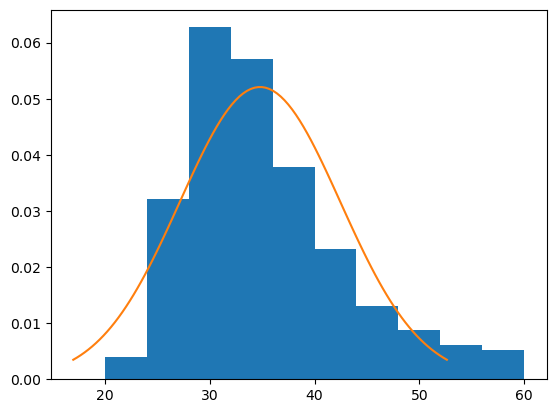

In [28]:
# Plot a histogram and pdf for a few features

x = feats_dataset['age']
x_rv = stats.norm(loc=feats_dataset['age'].mean(), scale=feats_dataset['age'].std())
fr_x = np.linspace(x_rv.ppf(0.01), x_rv.ppf(0.99), 100)

plt.hist(x, density=True);
plt.plot(fr_x, x_rv.pdf(fr_x));
plt.show();

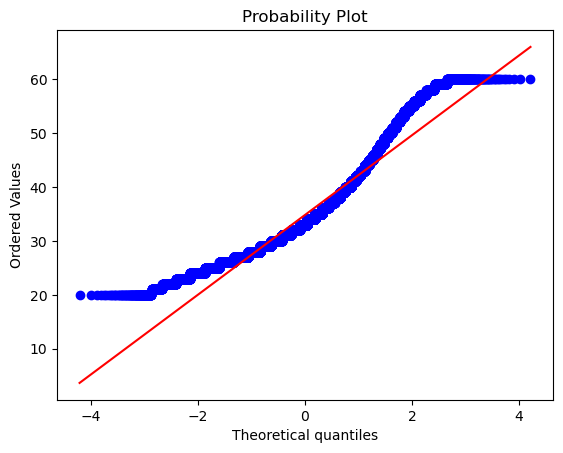

In [29]:
stats.probplot(x,plot=plt);

In [33]:
## Visualize the distribution for 3 different features

promo_data = feats_dataset.loc[feats_dataset["is_promoted"] == 'Promoted']
not_promo_data = feats_dataset.loc[feats_dataset["is_promoted"] == 'Not Promoted']

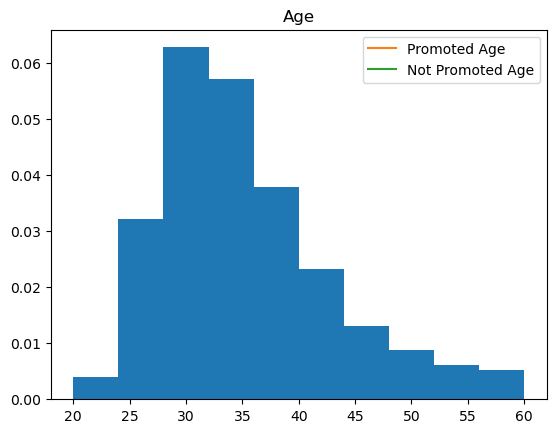

In [38]:
x = feats_dataset['age']

x1 = promo_data['age']
x_rv1 = stats.norm(loc=x1.mean(), scale=x1.std())
fr_x1 = np.linspace(x_rv1.ppf(0.01), x_rv1.ppf(0.99), 100)

x2 = not_promo_data['age']
x_rv2 = stats.norm(loc=x2.mean(), scale=x2.std())
fr_x2 = np.linspace(x_rv2.ppf(0.01), x_rv2.ppf(0.99), 100)

plt.hist(x, density=True);
plt.plot(fr_x1, x_rv1.pdf(fr_x1), label='Promoted Age');
plt.plot(fr_x2, x_rv2.pdf(fr_x2), label='Not Promoted Age');
plt.legend();
plt.title('Age');
plt.show();

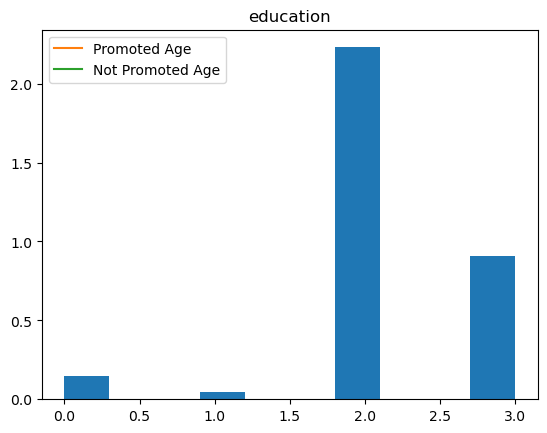

In [35]:
x = feats_dataset['education']

x1 = promo_data['education']
x_rv1 = stats.norm(loc=x1.mean(), scale=x1.std())
fr_x1 = np.linspace(x_rv1.ppf(0.01), x_rv1.ppf(0.99), 100)

x2 = not_promo_data['education']
x_rv2 = stats.norm(loc=x2.mean(), scale=x2.std())
fr_x2 = np.linspace(x_rv2.ppf(0.01), x_rv2.ppf(0.99), 100)

plt.hist(x, density=True);
plt.plot(fr_x1, x_rv1.pdf(fr_x1), label='Promoted Age');
plt.plot(fr_x2, x_rv2.pdf(fr_x2), label='Not Promoted Age');
plt.legend();
plt.title('education');
plt.show();

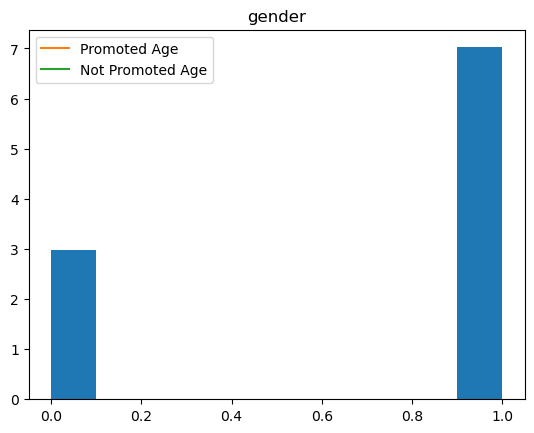

In [36]:
x = feats_dataset['gender']

x1 = promo_data['gender']
x_rv1 = stats.norm(loc=x1.mean(), scale=x1.std())
fr_x1 = np.linspace(x_rv1.ppf(0.01), x_rv1.ppf(0.99), 100)

x2 = not_promo_data['gender']
x_rv2 = stats.norm(loc=x2.mean(), scale=x2.std())
fr_x2 = np.linspace(x_rv2.ppf(0.01), x_rv2.ppf(0.99), 100)

plt.hist(x, density=True);
plt.plot(fr_x1, x_rv1.pdf(fr_x1), label='Promoted Age');
plt.plot(fr_x2, x_rv2.pdf(fr_x2), label='Not Promoted Age');
plt.legend();
plt.title('gender');
plt.show();

### References

MÖBIUS. (2021, January 10). HR Analytics: Employee Promotion Data. Kaggle. https://www.kaggle.com/datasets/arashnic/hr-ana  

Banerjee, P. (2020, August 27). Naive Bayes Classifier in Python. Kaggle. https://www.kaggle.com/code/prashant111/naive-bayes-classifier-in-python  

AssemblyAI. (2022, September 17). How to implement Naive Bayes from scratch with Python. Youtube. https://www.youtube.com/watch?v=TLInuAorxqE  

Educational Research Techniques. (2022, May 6). Naive Bayes with Python. Youtube. https://www.youtube.com/watch?v=Q93IWdj5Td4  

